# Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX
Laboratorio práctico: Realice el laboratorio de predicción de aprendizaje automático

Space X anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno; gran parte de los ahorros se deben a que Space X puede reutilizar la primera etapa. Por lo tanto, si podemos determinar si la primera etapa aterrizará, podemos determinar el costo de un lanzamiento. Esta información se puede utilizar si una empresa alternativa desea presentar una oferta contra Space X para el lanzamiento de un cohete. En este laboratorio, creará una secuencia de aprendizaje automático para predecir si la primera etapa aterrizará según los datos de los laboratorios anteriores.

La mayoría de los aterrizajes exitosos están planeados. SpaceX realiza un aterrizaje controlado en los océanos.

## Objetivos
Realizar un análisis exploratorio de datos y determinar las etiquetas de entrenamiento

* crear una columna para la clase
* estandarizar los datos
* dividirlos en datos de entrenamiento y datos de prueba

\-Encontrar el mejor hiperparámetro para SVM, árboles de clasificación y regresión logística

* Encontrar el método que funciona mejor con los datos de prueba

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import requests
import io

Esta función sirve para trazar la matriz de confusión.

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

Cargar el dataframe

In [5]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
text1 = io.StringIO(response.text)
data = pd.read_csv(text1)

In [6]:
data.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
text2 = io.StringIO(response.text)
X = pd.read_csv(text2)

In [8]:
X.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


### Tarea 1
Cree una matriz NumPy a partir de la columna <code>Class</code> en <code>data</code>, aplicando el método <code>to_numpy()</code> y luego asígnelo a la variable <code>Y</code>. Asegúrese de que la salida sea una serie de Pandas (solo un corchete df\['nombre de la columna']).

In [9]:
Y = data['Class']

### Tarea 2
Estandarice los datos en X y luego reasignelos a la variable X utilizando la transformación proporcionada a continuación.

In [10]:
# Primero, convertimos las columnas no numéricas en X a valores numéricos o las eliminamos
# para este ejemplo, eliminaremos las columnas que no son numéricas
X = X.select_dtypes(include=[np.number])

# Ahora aplicamos el StandardScaler
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X)

Dividimos los datos en datos de entrenamiento y de prueba utilizando la función train_test_split. Los datos de entrenamiento se dividen en datos de validación y un segundo conjunto se utiliza para los datos de entrenamiento; luego, se entrenan los modelos y se seleccionan los hiperparámetros utilizando la función GridSearchCV.

### Tarea 3
Utilice la función train_test_split para dividir los datos X e Y en datos de entrenamiento y de prueba. Establezca el parámetro test_size en 0,2 y random_state en 2. Los datos de entrenamiento y de prueba deben asignarse a las siguientes etiquetas.


X_train, X_test, Y_train, Y_test

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2,random_state=42)

Podemos ver que solo tenemos 18 muestras de prueba.

In [12]:
Y_test.shape

(18,)

### Tarea 4
Cree un objeto de regresión logística y luego cree un objeto GridSearchCV <code>logreg_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [14]:
# Creación del objeto GridSearchCV con cv = 10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajuste del objeto para encontrar los mejores parámetros
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Generamos el objeto <code>GridSearchCV</code> para la regresión logística. Mostramos los mejores parámetros utilizando el atributo de datos <code>best_params\_</code> y la precisión de los datos de validación utilizando el atributo de datos <code>best_score\_</code>.

In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 1.0


### Tarea 5
Calcule la precisión de los datos de prueba utilizando el método <code>score</code>:

In [16]:
test_score1 = logreg_cv.score(X_train, Y_train)
print(f"{test_score1:.3f}")

1.000


Veamos la matriz de confusión:

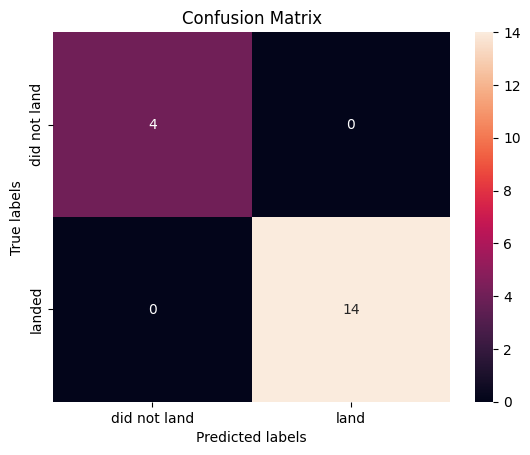

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Al examinar la matriz de confusión, vemos que la regresión logística puede distinguir entre las diferentes clases. Vemos que el problema son los falsos positivos.

Descripción general:

Verdadero positivo: 12 (la etiqueta verdadera está definida, la etiqueta predicha también está definida)

Falso positivo: 3 (la etiqueta verdadera no está definida, la etiqueta predicha está definida)

### Tarea 6
Cree un objeto de máquina de vectores de soporte y luego cree un objeto <code>GridSearchCV</code> <code>svm_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}
accuracy : 1.0


### Tarea 7 
Calcule la precisión de los datos de prueba utilizando el método <code>score</code>:

In [21]:
test_score2 = svm_cv.score(X_test, Y_test)
print(f"{test_score2:.3f}")

1.000


Podemos graficar la matriz de confusión

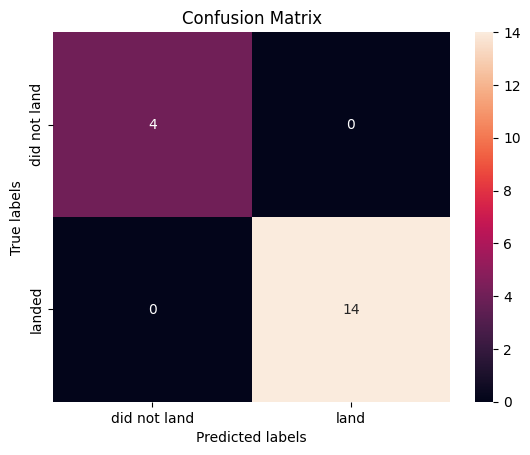

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Tarea 8
Cree un objeto clasificador de árbol de decisión y luego cree un objeto <code>GridSearchCV</code> <code>tree_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    v

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 1.0


### Tarea 9
Calcule la precisión de tree_cv en los datos de prueba utilizando el método <code>score</code>:

In [26]:
test_score3 = tree_cv.score(X_test, Y_test)
print(f"{test_score3:.3f}")

0.778


Podemos graficar la matriz de confusión

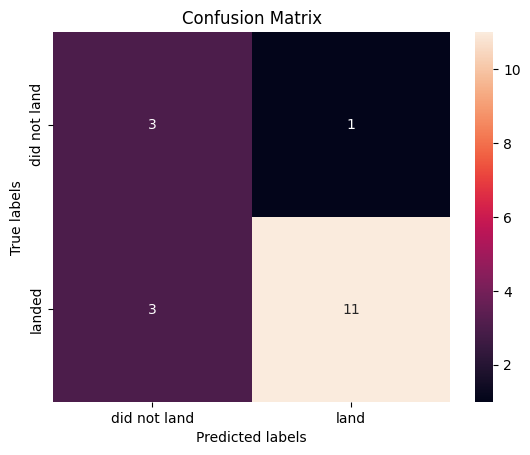

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Tarea 10
Cree un objeto de k vecinos más cercanos y luego cree un objeto <code>GridSearchCV</code> <code>knn_cv</code> con cv = 10. Ajuste el objeto para encontrar los mejores parámetros del diccionario <code>parameters</code>.

In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}
accuracy : 0.9857142857142858


### Tarea 11
Calcule la precisión de knn_cv en los datos de prueba utilizando el método <code>score</code>:

In [31]:
test_score4 = knn_cv.score(X_test, Y_test)
print(f"{test_score4:.3f}")

1.000


Podemos graficar la matriz de confusión

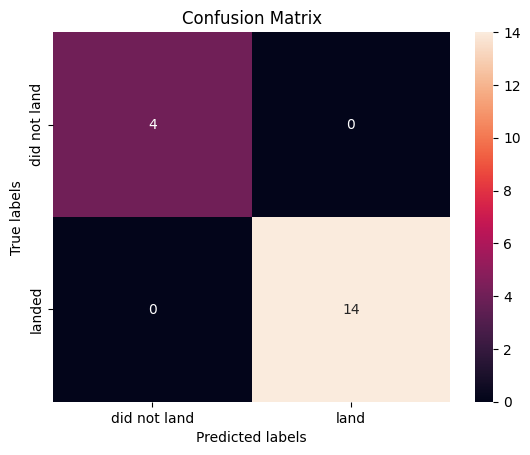

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Tarea 12
Encuentra el método que funciona mejor:

Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Máquina de Vectores de Soporte:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.92      0.79      0.85        14

    accuracy                           0.78        18
   macro avg       0.71      0.77      0.72        18

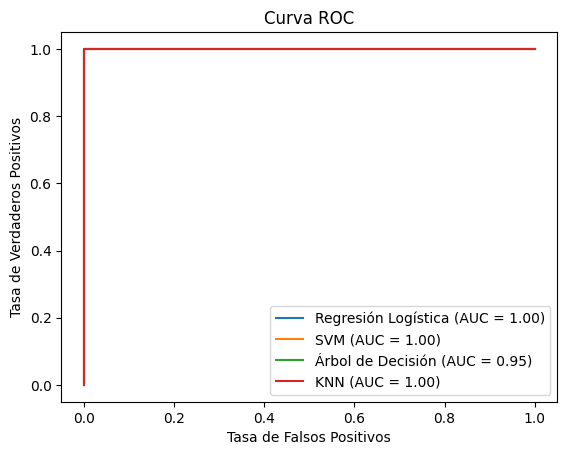

In [33]:
from sklearn.metrics import classification_report, roc_curve, auc

# Regresión Logística
yhat_logreg = logreg_cv.predict(X_test)
print("Regresión Logística:\n", classification_report(Y_test, yhat_logreg))
fpr, tpr, _ = roc_curve(Y_test, logreg_cv.predict_proba(X_test)[:,1])
roc_auc_logreg = auc(fpr, tpr)

# SVM
yhat_svm = svm_cv.predict(X_test)
print("Máquina de Vectores de Soporte:\n", classification_report(Y_test, yhat_svm))
fpr, tpr, _ = roc_curve(Y_test, svm_cv.decision_function(X_test))
roc_auc_svm = auc(fpr, tpr)

# Árbol de Decisión
yhat_tree = tree_cv.predict(X_test)
print("Árbol de Decisión:\n", classification_report(Y_test, yhat_tree))
fpr, tpr, _ = roc_curve(Y_test, tree_cv.predict_proba(X_test)[:,1])
roc_auc_tree = auc(fpr, tpr)

# KNN
yhat_knn = knn_cv.predict(X_test)
print("K Vecinos Más Cercanos:\n", classification_report(Y_test, yhat_knn))
fpr, tpr, _ = roc_curve(Y_test, knn_cv.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr, tpr)

# Graficar curvas ROC
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# Código principal optimizado

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8035714285714285
0.958


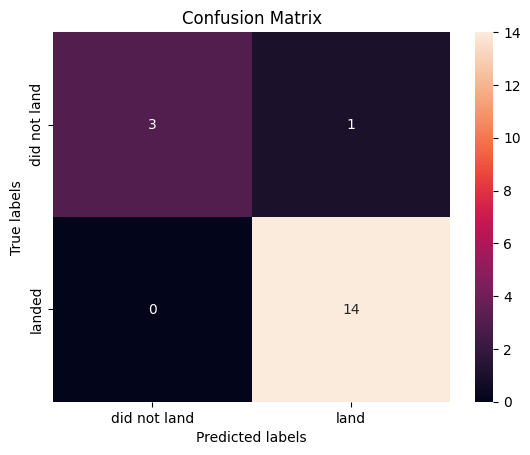

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.832142857142857
0.889


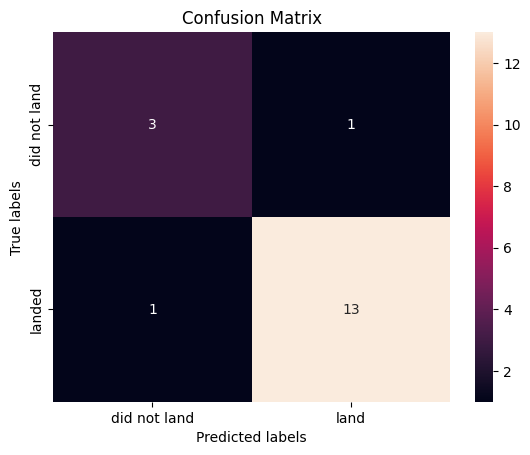

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8607142857142858
0.889


C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\rodri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    v

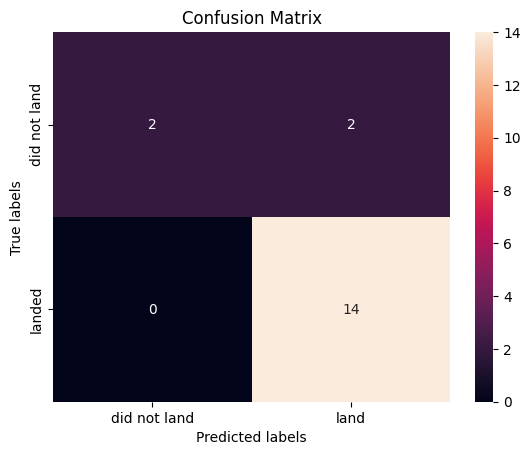

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569
0.944


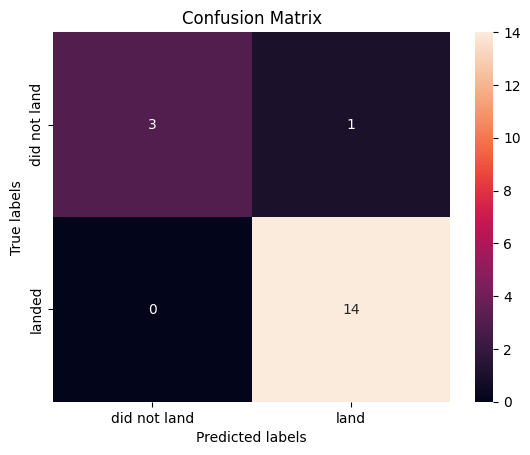

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import requests
import io

def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show() 

# Cargando el dataframe
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

Y = data['Class']

# Convertir columnas no numéricas en X a valores numéricos o eliminarlas
X = X.select_dtypes(include=[np.number])

# Aplicar StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# División en datos de prueba y entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=42)

#########################Comparación entre modelos de ML###############################
# Regresión logística
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)
test_score1 = logreg_cv.score(X_train, Y_train)
print(f"{test_score1:.3f}")
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Máquina de vectores de soporte
parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)
test_score2 = svm_cv.score(X_test, Y_test)
print(f"{test_score2:.3f}")
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Clasificador de árbol de decisión
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)
test_score3 = tree_cv.score(X_test, Y_test)
print(f"{test_score3:.3f}")
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# K vecinos más cercanos
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)
test_score4 = knn_cv.score(X_test, Y_test)
print(f"{test_score4:.3f}")
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)
